In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [39]:
df=pd.read_csv("C:/Users/chaitanya/BOOTCAMP/train.csv")

In [40]:
df.shape

(891, 12)

In [41]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [43]:
y=df.isnull().sum()
y

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [44]:
col=y[y>(.35*df.shape[0])]
col

Cabin    687
dtype: int64

In [45]:
df.drop(["Cabin"],axis=1,inplace=True)

In [46]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [47]:
df["Embarked"].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [48]:
df['Embarked'] = df['Embarked'].fillna('S')

In [49]:
df=df.fillna(int(df["Age"].mean()))

In [50]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
dtype: bool

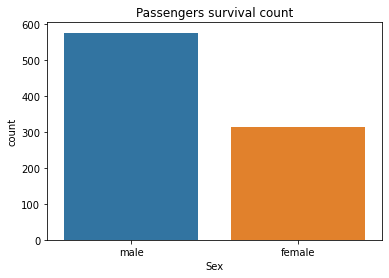

In [51]:
sb.countplot(x='Sex',data=df)
plt.title("Passengers survival count")
plt.show()

In [52]:
df['Pclass'].value_counts(normalize=True)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

In [53]:
data=df["Embarked"].value_counts()

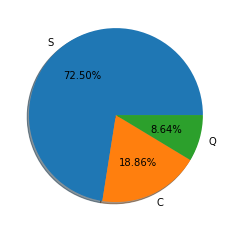

In [54]:
labels=["S","C","Q"] 
plt.pie(data, labels =labels,shadow=True, autopct="%0.2f%%")
plt.show()

In [55]:
df['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

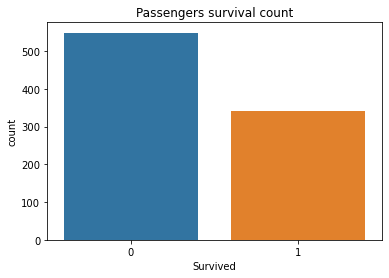

In [56]:
sb.countplot(x='Survived',data=df)
plt.title("Passengers survival count")
plt.show()

Observation: 61% of passengers have survived

In [57]:
df.groupby(['Sex'])['Survived'].mean().reset_index()

,Sex,Survived
0,female,0.742038
1,male,0.188908


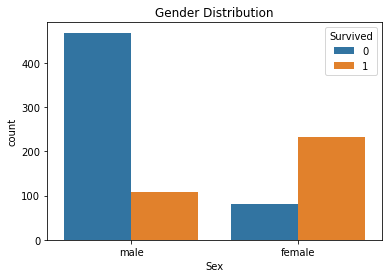

In [58]:
sb.countplot(x='Sex',hue='Survived',data=df)
plt.title("Gender Distribution")
plt.show()

Observation: 

The chance of survival of female is more than that of man.
74% female had survived but only 18% men were able to survive.

In [59]:
df.groupby(['Pclass'])['Survived'].mean().reset_index()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


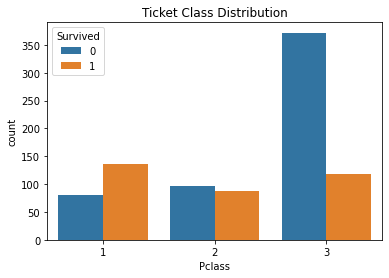

In [60]:
sb.countplot(x='Pclass',hue='Survived',data=df)
plt.title("Ticket Class Distribution")
plt.show()

Observation:

Class 1 passengers have more chances of survival than class 2 and class 3 Passengers.

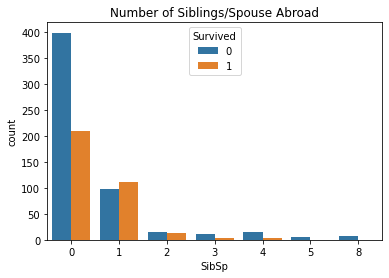

In [61]:
sb.countplot(x='SibSp',hue='Survived',data=df)
plt.title("Number of Siblings/Spouse Abroad")
plt.show()

Observation : Most number of people who have survived are travelling alone.

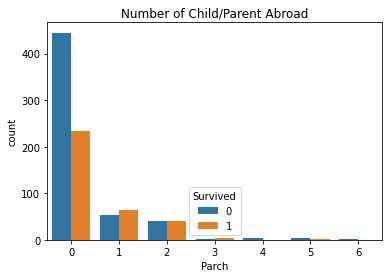

In [62]:
sb.countplot(x='Parch',hue='Survived',data=df)
plt.title("Number of Child/Parent Abroad")
plt.show()

Observation :     Most number of passengers who have survived are alone travellers.


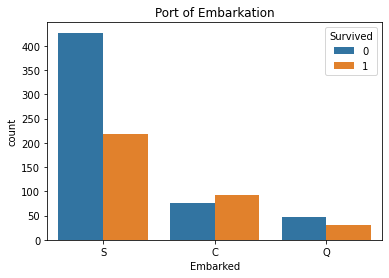

In [63]:
sb.countplot(x='Embarked',hue='Survived', data=df)
plt.title("Port of Embarkation")
plt.show()

Observation : Most Percentage of passengers survived who boarded from Cherbourg Port.

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


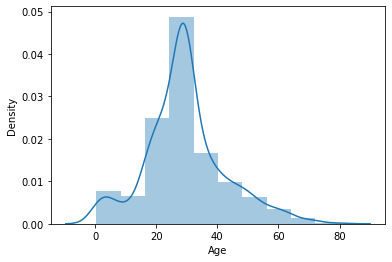

In [64]:
sb.distplot(df['Age'],kde=True,bins=10) #kde-> kernel density estimation
plt.show()

 Observation :   Most number of passengers are in the range of 25 - 35

<AxesSubplot:xlabel='Sex', ylabel='Age'>

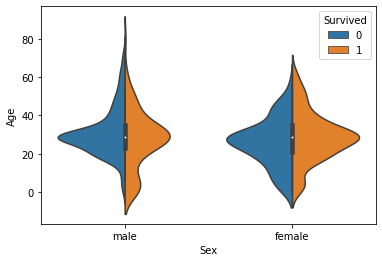

In [65]:
sb.violinplot(x ="Sex", y ="Age", hue ="Survived", data = df, split = True)

Observation : 

High for women in the age range 20-50.
Less for men as the age increases.

In [66]:
df.groupby(['SibSp'])['Survived'].mean().reset_index()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

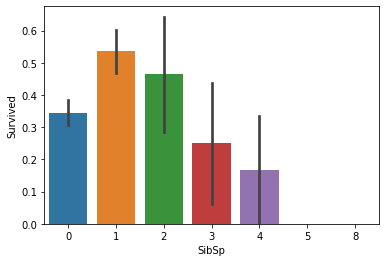

In [67]:
sb.barplot('SibSp','Survived',data=df)

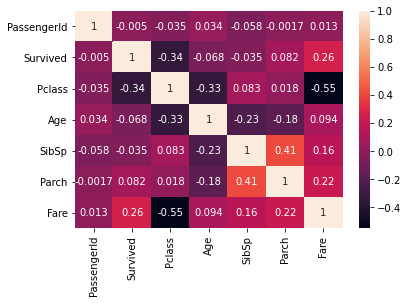

In [68]:
corr = df.corr()


sb.heatmap(corr, annot = True )
plt.show()

Observation : 

Survived and Fare positively correlated, Survived and Sex_male negatively correlated.

Also, Survived and Pclass_3 negatively correlated. SibSp and Parch correlated

**CONCLUSIONS :**
    

- Female Passengers are more than Males
- Among all the passengers most of them are in aged between 20 to 40
- Most Of the Survivors are those who don't have any siblings or Alone
- Survival rate is high for women as compared to Men
- Class 1 passengers have more chances of survival than class 2 and class 3 Passengers.